In [44]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import pickle
%matplotlib inline


In [21]:
prob = pd.read_csv('../models/TestSet1Predictions.csv')
prob_snr = np.load('../models/snr_preds.npy')


In [66]:
prob.columns

Index(['Index', '16PSK', '2FSK_5KHz', '2FSK_75KHz', '8PSK', 'AM_DSB', 'AM_SSB',
       'APSK16_c34', 'APSK32_c34', 'BPSK', 'CPFSK_5KHz', 'CPFSK_75KHz',
       'FM_NB', 'FM_WB', 'GFSK_5KHz', 'GFSK_75KHz', 'GMSK', 'MSK', 'NOISE',
       'OQPSK', 'PI4QPSK', 'QAM16', 'QAM32', 'QAM64', 'QPSK'],
      dtype='object')

In [28]:
pred_snr = np.argmax(prob_snr, axis=1)
pred = prob[prob.columns[1:]].idxmax(axis=1)

In [59]:
testfile = '/home/yunfanz/Test_Set_1_Army_Signal_Challenge.pkl'
trainfile = '/bldata/army_challenge/training_data/training_data_chunk_0.pkl'
ft = open(testfile, 'rb')
ftr = open(trainfile, 'rb')
testdata = pickle.load(ft, encoding='latin-1')
traindata = pickle.load(ftr, encoding='lating-1')

16PSK 600


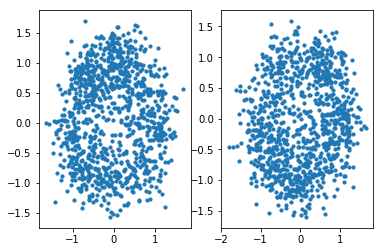

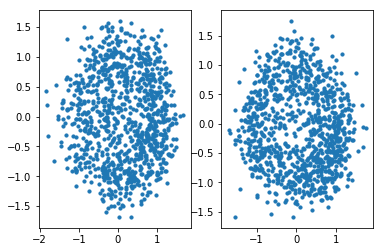

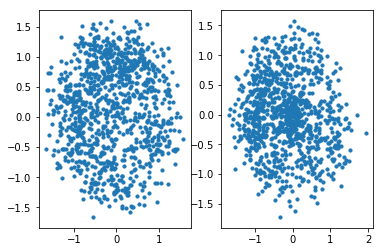

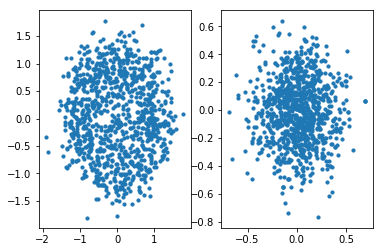

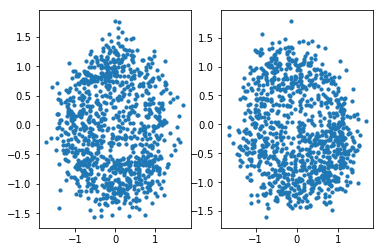

2FSK_5KHz 831


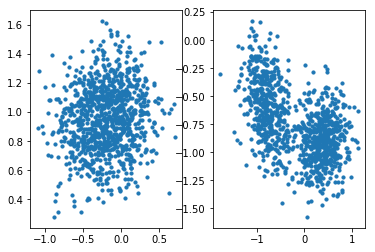

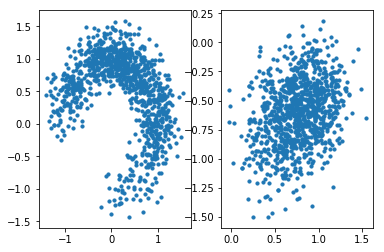

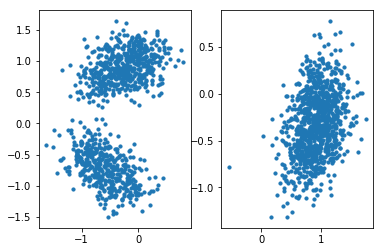

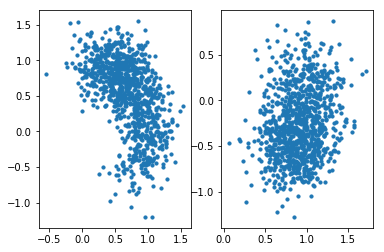

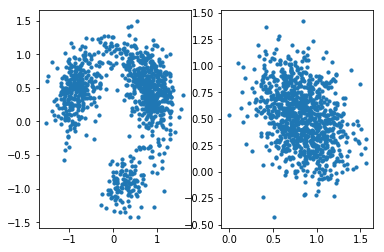

2FSK_75KHz 832


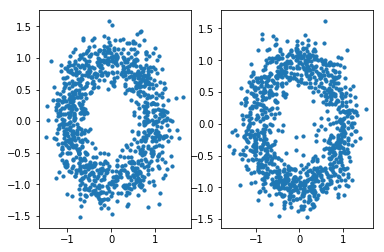

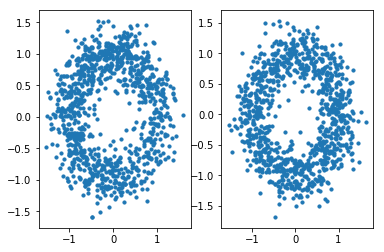

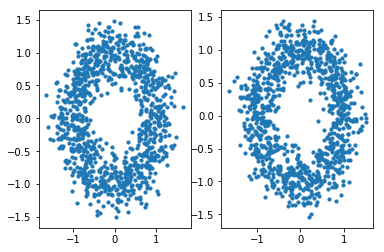

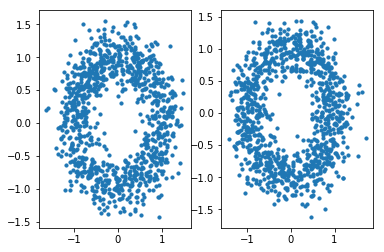

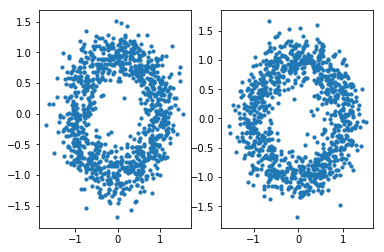

8PSK 1425


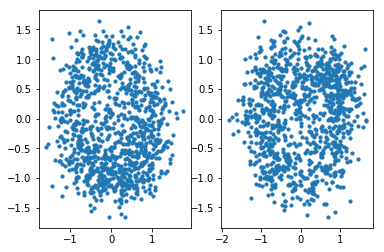

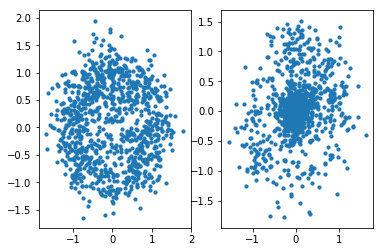

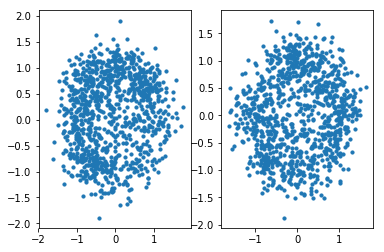

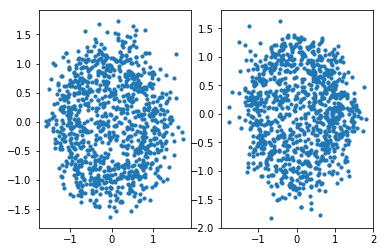

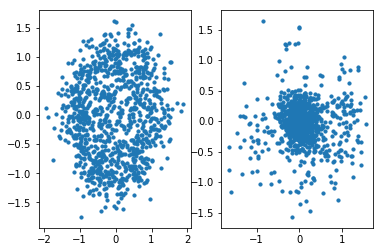

AM_DSB 943


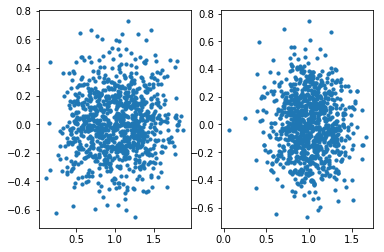

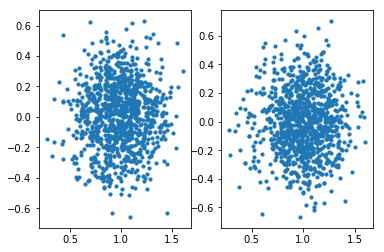

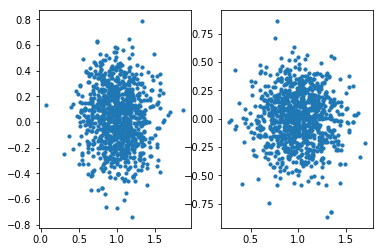

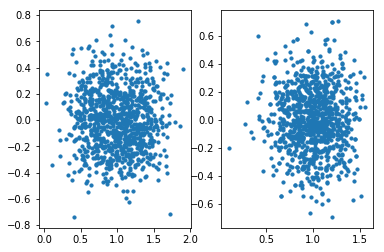

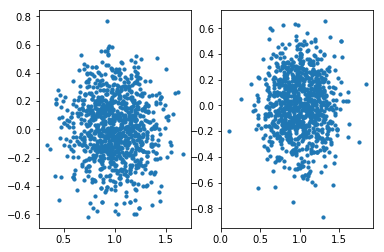

AM_SSB 602


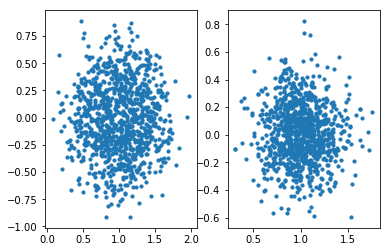

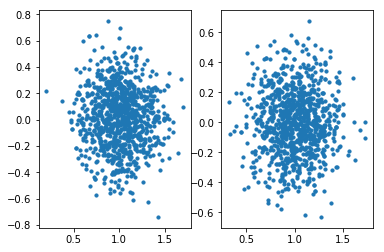

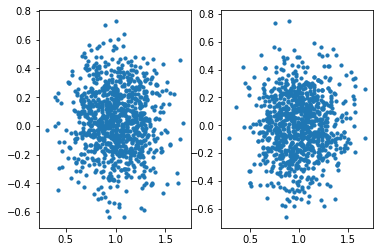

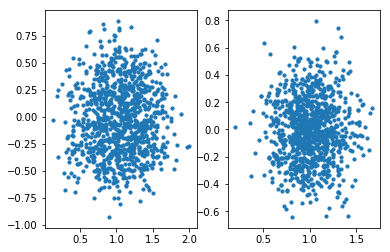

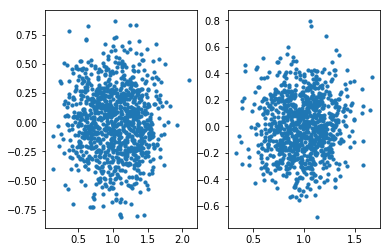

APSK16_c34 549


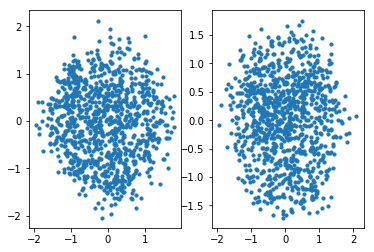

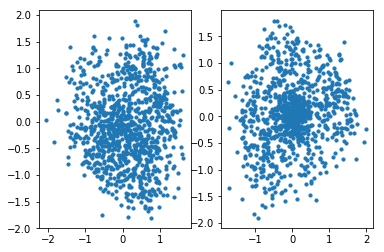

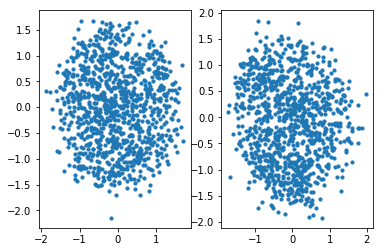

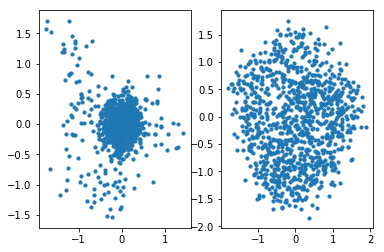

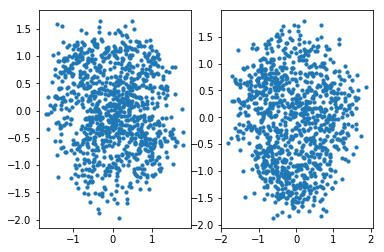

APSK32_c34 619


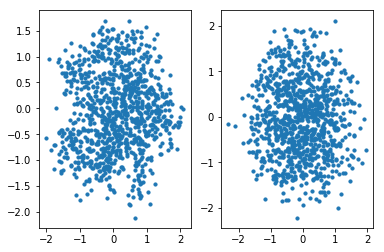

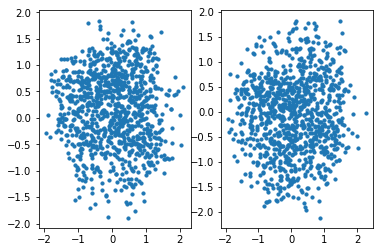

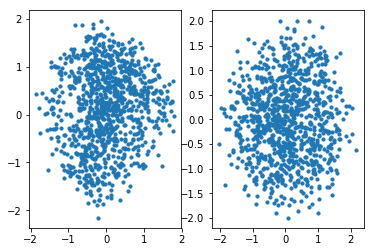

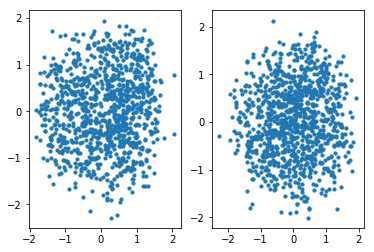

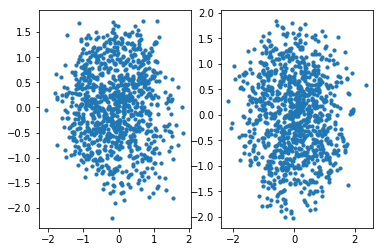

BPSK 654


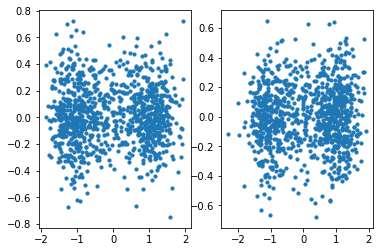

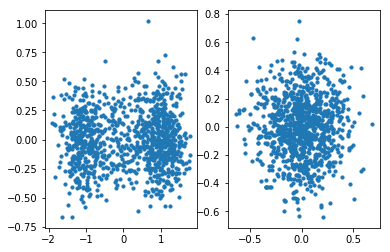

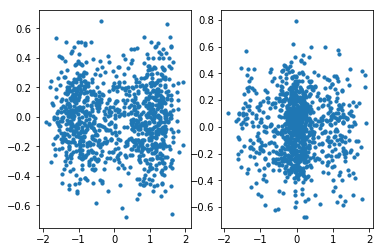

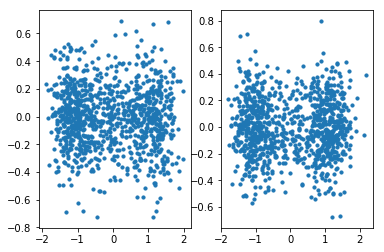

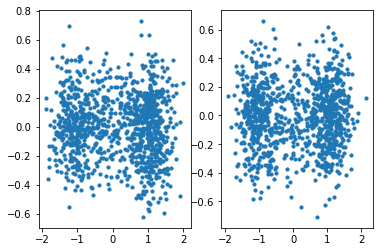

CPFSK_5KHz 597


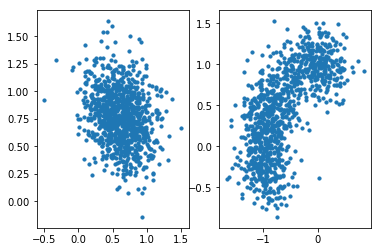

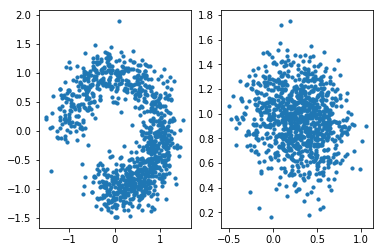

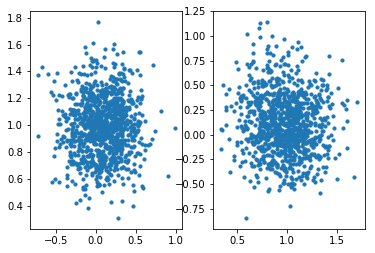

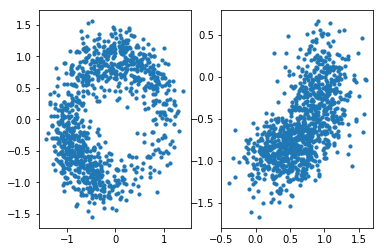

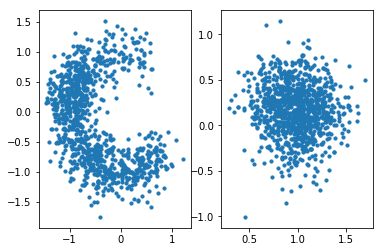

CPFSK_75KHz 799


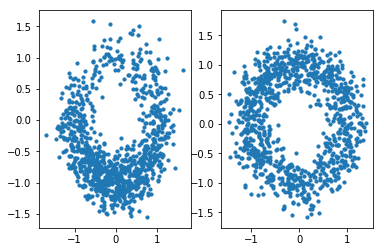

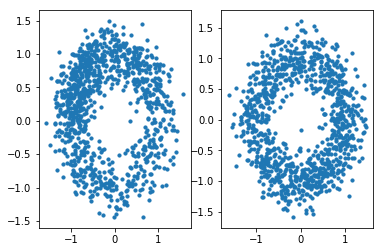

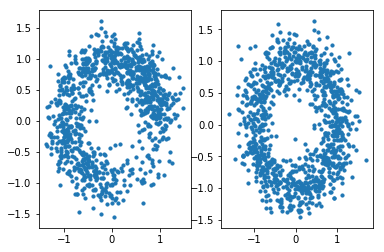

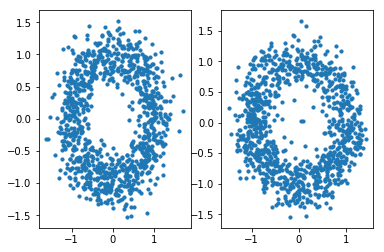

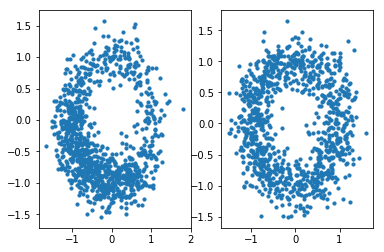

FM_NB 1039


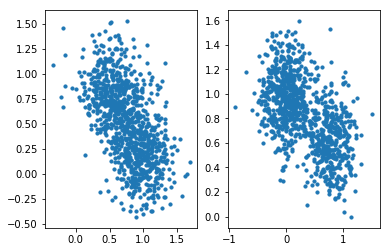

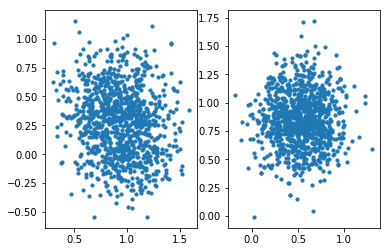

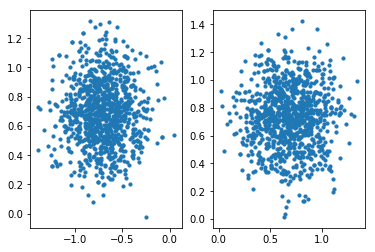

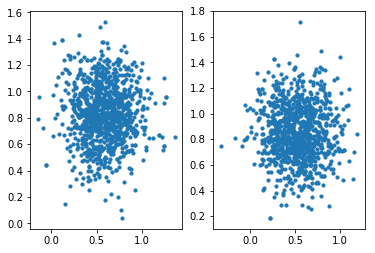

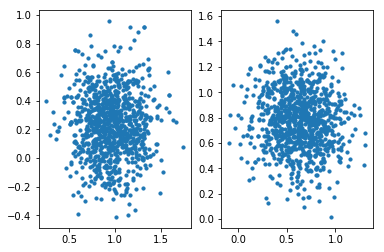

FM_WB 7


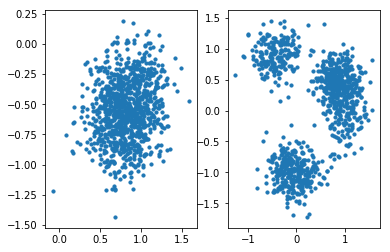

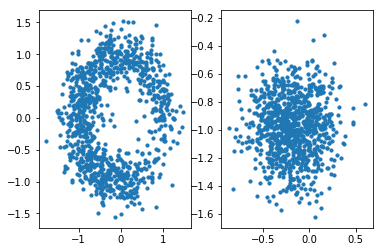

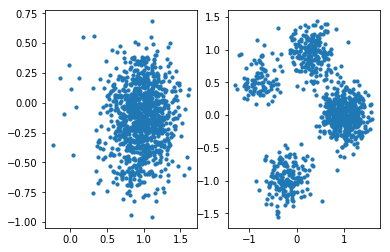

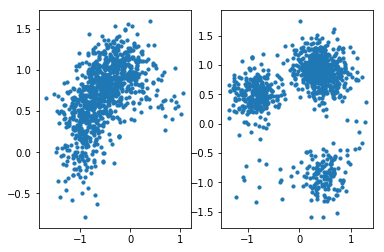

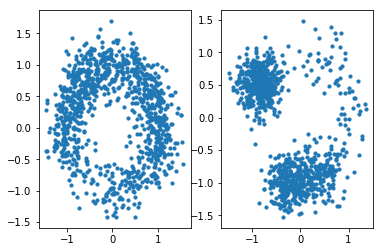

GFSK_5KHz 973


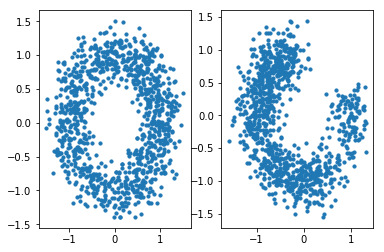

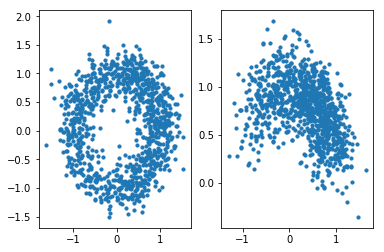

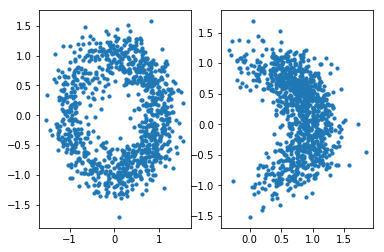

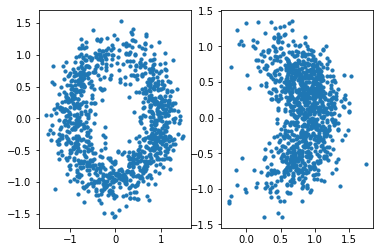

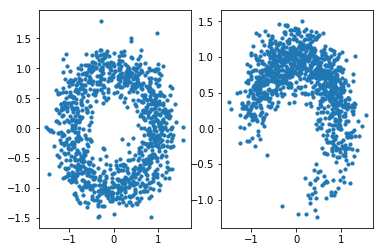

GFSK_75KHz 690


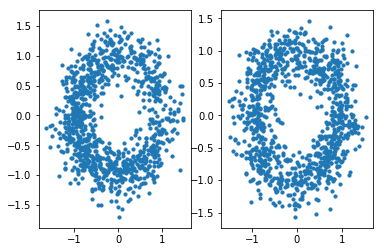

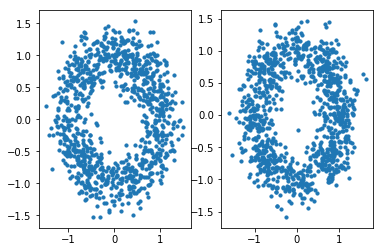

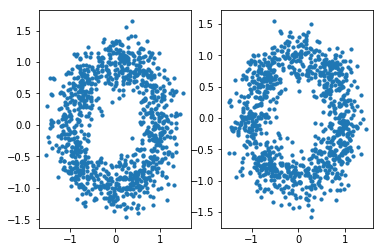

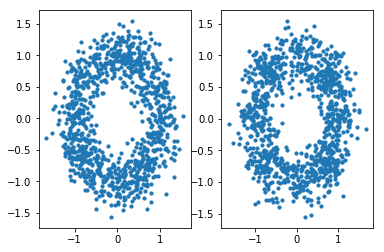

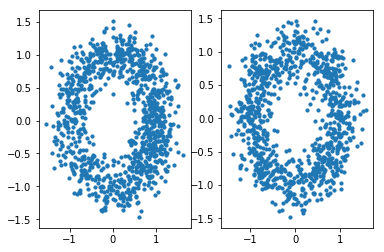

GMSK 493


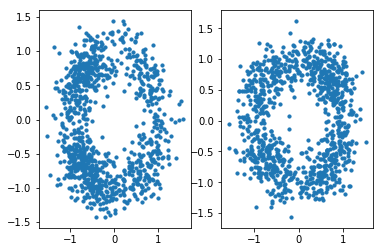

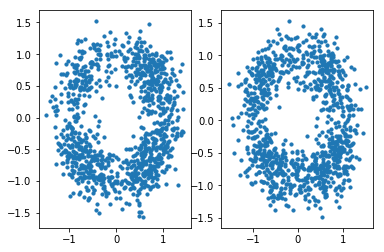

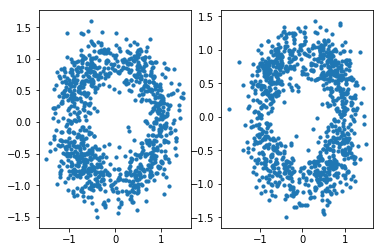

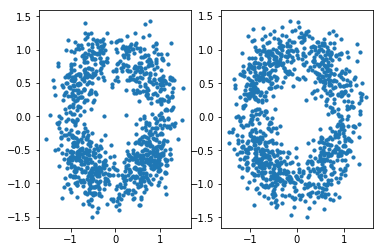

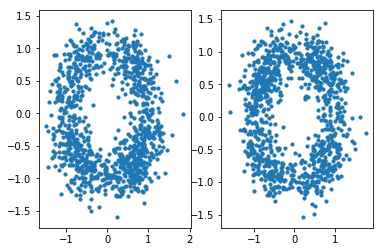

MSK 526


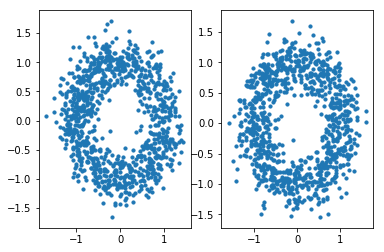

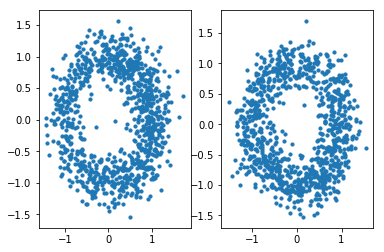

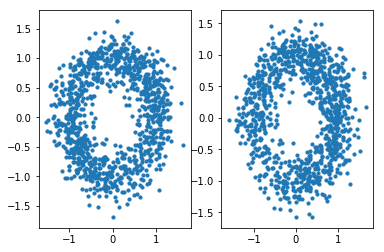

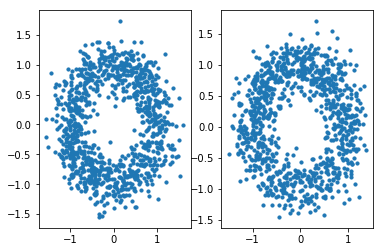

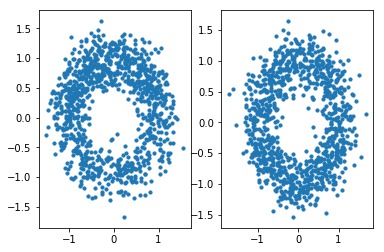

NOISE 747


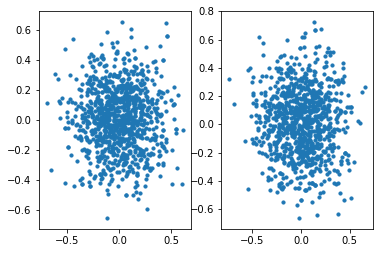

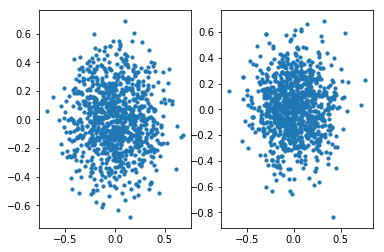

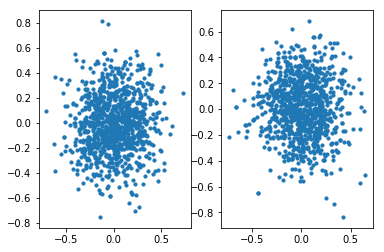

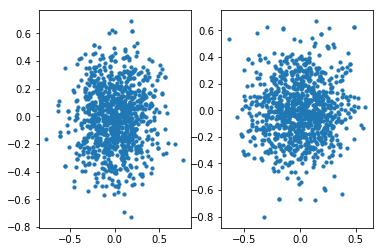

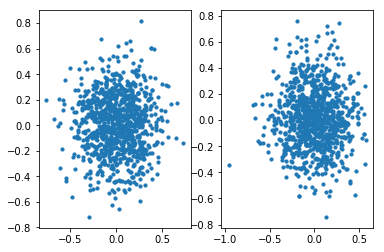

OQPSK 37


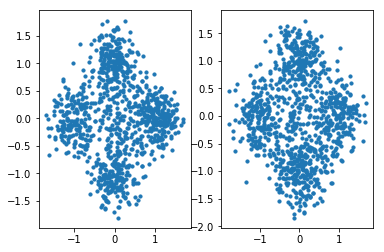

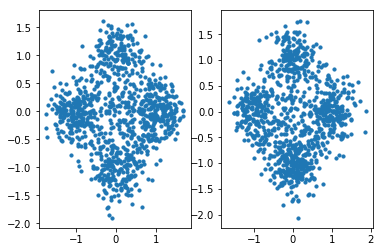

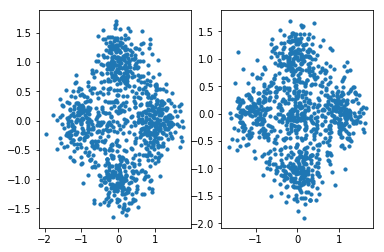

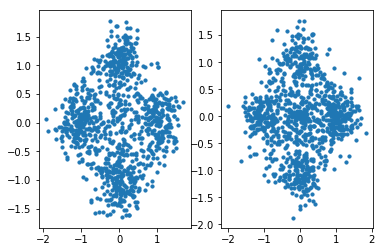

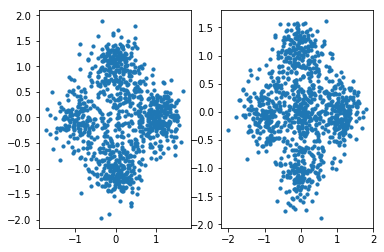

PI4QPSK 1386


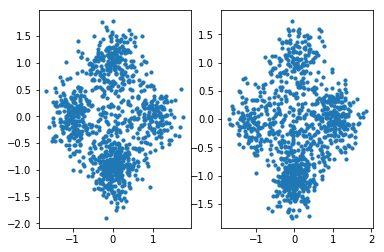

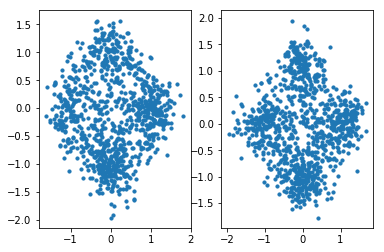

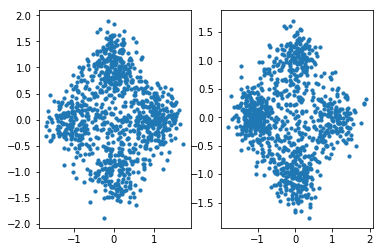

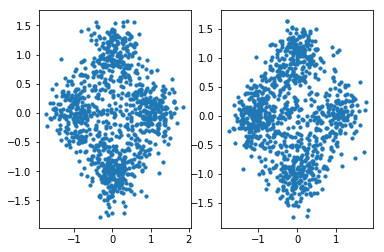

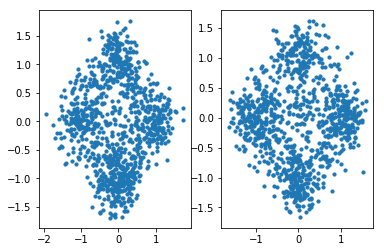

QAM16 592


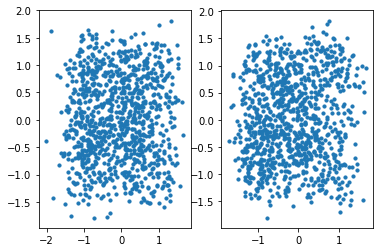

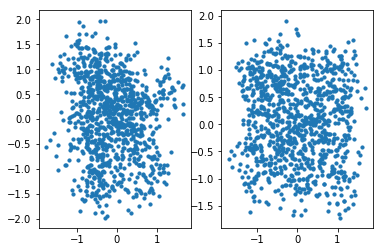

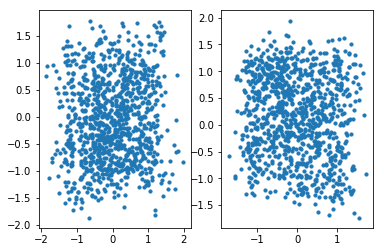

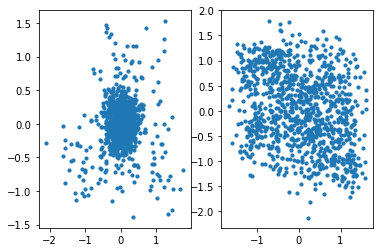

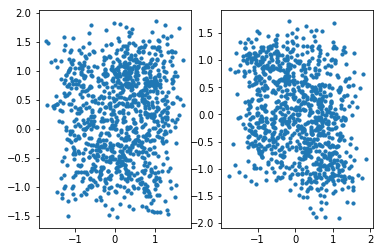

QAM32 881


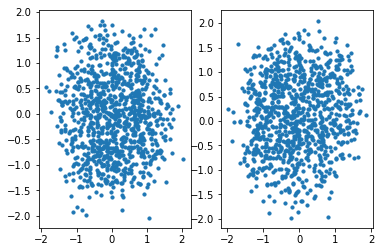

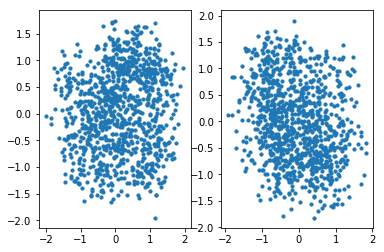

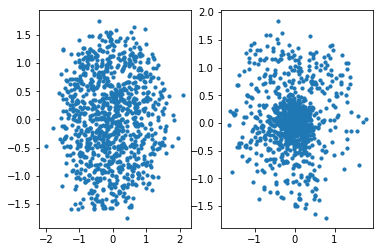

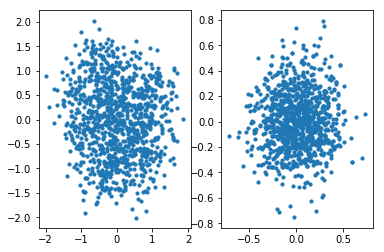

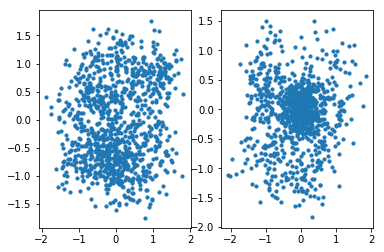

QAM64 739


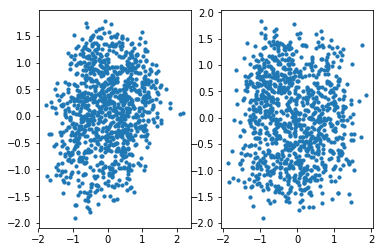

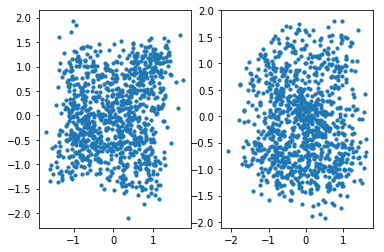

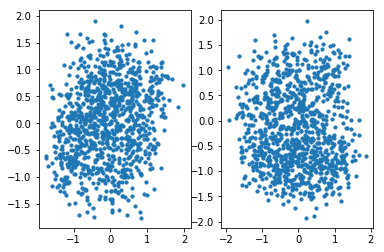

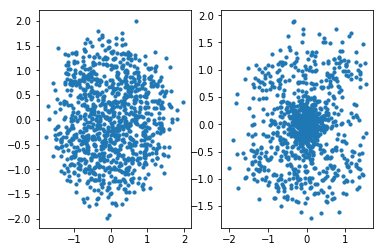

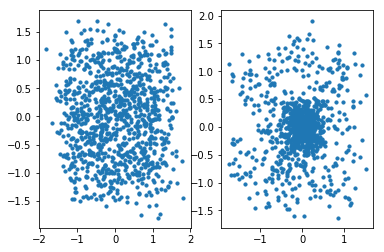

QPSK 22


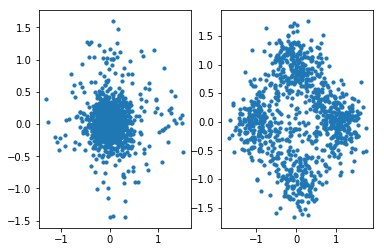

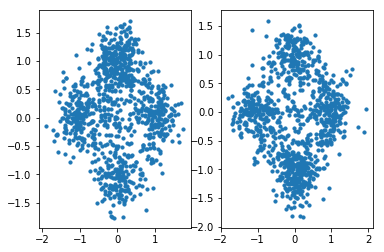

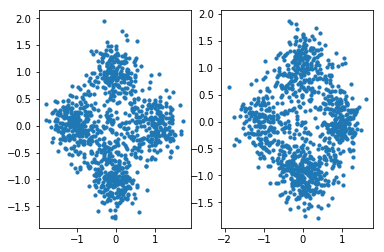

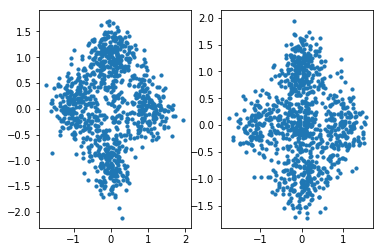

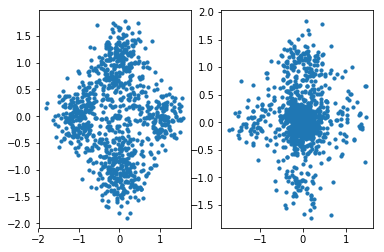

In [75]:
MOD = 'OQPSK'
for MOD in prob.columns[1:]:
    ind = np.asarray(pred.index[np.logical_and(pred_snr==5, pred==MOD)])
    print(MOD, ind.size)
    for i in range(5):
        test_signal = testdata[ind[i]+1]
        train_signal = traindata[(MOD, 10)][i]
        f, (ax1, ax2) = plt.subplots(1,2)
        ax1.scatter(test_signal[0], test_signal[1], s=10)
        ax2.scatter(train_signal[0], train_signal[1], s=10)
    plt.show()

In [69]:
pred_snr

array([5, 2, 3, ..., 5, 5, 0])

In [73]:
pred

0             AM_SSB
1         APSK32_c34
2         APSK32_c34
3         2FSK_75KHz
4             AM_SSB
5          2FSK_5KHz
6         2FSK_75KHz
7            PI4QPSK
8         2FSK_75KHz
9            PI4QPSK
10            AM_DSB
11             FM_NB
12             QAM64
13         GFSK_5KHz
14             NOISE
15             16PSK
16        APSK32_c34
17               MSK
18             QAM32
19              8PSK
20              QPSK
21             FM_NB
22             QAM32
23              8PSK
24         GFSK_5KHz
25           PI4QPSK
26        APSK32_c34
27             FM_NB
28             QAM64
29        GFSK_75KHz
            ...     
99970    CPFSK_75KHz
99971           8PSK
99972          16PSK
99973     GFSK_75KHz
99974          QAM32
99975     APSK32_c34
99976          FM_NB
99977      GFSK_5KHz
99978     CPFSK_5KHz
99979          QAM64
99980     APSK32_c34
99981     2FSK_75KHz
99982          QAM64
99983           GMSK
99984     APSK16_c34
99985          QAM16
99986     2FS